# Εκτίμηση της Πανδημίας COVID-19

## Φόρτωση Δεδομένων

Θα χρησιμοποιήσουμε δεδομένα για τα άτομα που έχουν μολυνθεί από τον COVID-19, τα οποία παρέχονται από το [Center for Systems Science and Engineering](https://systems.jhu.edu/) (CSSE) του [Πανεπιστημίου Johns Hopkins](https://jhu.edu/). Το σύνολο δεδομένων είναι διαθέσιμο σε [αυτό το αποθετήριο GitHub](https://github.com/CSSEGISandData/COVID-19).


In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,3) # make figures larger

Μπορούμε να φορτώσουμε τα πιο πρόσφατα δεδομένα απευθείας από το GitHub χρησιμοποιώντας `pd.read_csv`. Εάν για κάποιο λόγο τα δεδομένα δεν είναι διαθέσιμα, μπορείτε πάντα να χρησιμοποιήσετε το αντίγραφο που είναι διαθέσιμο τοπικά στον φάκελο `data` - απλώς αφαιρέστε το σχόλιο από την παρακάτω γραμμή που ορίζει το `base_url`:


In [125]:
base_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/" # loading from Internet
# base_url = "../../data/COVID/" # loading from disk
infected_dataset_url = base_url + "time_series_covid19_confirmed_global.csv"
recovered_dataset_url = base_url + "time_series_covid19_recovered_global.csv"
deaths_dataset_url = base_url + "time_series_covid19_deaths_global.csv"
countries_dataset_url = base_url + "../UID_ISO_FIPS_LookUp_Table.csv"

In [126]:
infected = pd.read_csv(infected_dataset_url)
infected.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  8/20/21  8/21/21  8/22/21  \
0        0        0        0        0  ...   152448   152448   152448   
1        0        0        0        0  ...   138132   138790   139324   
2        0        0        0        0  ...   190656   191171   191583   
3        0        0        0        0  ...    14988    14988    14988   
4        0        0        0        0  ...    45583    45817    45945   

   8/23/21  8/24/21  8/25/21  8/26/21  8/27/21  8/28/21  8/29/21  
0   152583   152660   152722   152822   152960   152960   152960  
1   139721   140521   141365   142253   143174   144079   144847  
2   192089   192626   193171   193674   194186   194671   195162  
3    15002    15003    15014    15016    15025    15025    15025  
4    46076    46340    46539    46726    46929    47079    47168  

[5 rows x 590 columns]

Μπορούμε να δούμε ότι κάθε γραμμή του πίνακα ορίζει τον αριθμό των μολυσμένων ατόμων για κάθε χώρα και/ή επαρχία, και οι στήλες αντιστοιχούν σε ημερομηνίες. Παρόμοιοι πίνακες μπορούν να φορτωθούν για άλλα δεδομένα, όπως ο αριθμός των αναρρωμένων και ο αριθμός των θανάτων.


In [127]:
recovered = pd.read_csv(recovered_dataset_url)
deaths = pd.read_csv(deaths_dataset_url)

## Κατανόηση των Δεδομένων

Από τον παραπάνω πίνακα, ο ρόλος της στήλης επαρχίας δεν είναι ξεκάθαρος. Ας δούμε τις διάφορες τιμές που υπάρχουν στη στήλη `Province/State`:


In [128]:
infected['Province/State'].value_counts()

Australian Capital Territory    1
Xinjiang                        1
Martinique                      1
Guadeloupe                      1
French Polynesia                1
                               ..
Fujian                          1
Chongqing                       1
Beijing                         1
Anhui                           1
Turks and Caicos Islands        1
Name: Province/State, Length: 87, dtype: int64

In [129]:
infected[infected['Country/Region']=='China']

Province/State Country/Region      Lat      Long  1/22/20  1/23/20  \
58           Anhui          China  31.8257  117.2264        1        9   
59         Beijing          China  40.1824  116.4142       14       22   
60       Chongqing          China  30.0572  107.8740        6        9   
61          Fujian          China  26.0789  117.9874        1        5   
62           Gansu          China  35.7518  104.2861        0        2   
63       Guangdong          China  23.3417  113.4244       26       32   
64         Guangxi          China  23.8298  108.7881        2        5   
65         Guizhou          China  26.8154  106.8748        1        3   
66          Hainan          China  19.1959  109.7453        4        5   
67           Hebei          China  39.5490  116.1306        1        1   
68    Heilongjiang          China  47.8620  127.7615        0        2   
69           Henan          China  37.8957  114.9042        5        5   
70       Hong Kong          China  22.3000  114.2000        0        2   
71           Hubei          China  30.9756  112.2707      444      444   
72           Hunan          China  27.6104  111.7088        4        9   
73  Inner Mongolia          China  44.0935  113.9448        0        0   
74         Jiangsu          China  32.9711  119.4550        1        5   
75         Jiangxi          China  27.6140  115.7221        2        7   
76           Jilin          China  43.6661  126.1923        0        1   
77        Liaoning          China  41.2956  122.6085        2        3   
78           Macau          China  22.1667  113.5500        1        2   
79         Ningxia          China  37.2692  106.1655        1        1   
80         Qinghai          China  35.7452   95.9956        0        0   
81         Shaanxi          China  35.1917  108.8701        0        3   
82        Shandong          China  36.3427  118.1498        2        6   
83        Shanghai          China  31.2020  121.4491        9       16   
84          Shanxi          China  37.5777  112.2922        1        1   
85         Sichuan          China  30.6171  102.7103        5        8   
86         Tianjin          China  39.3054  117.3230        4        4   
87           Tibet          China  31.6927   88.0924        0        0   
88         Unknown          China      NaN       NaN        0        0   
89        Xinjiang          China  41.1129   85.2401        0        2   
90          Yunnan          China  24.9740  101.4870        1        2   
91        Zhejiang          China  29.1832  120.0934       10       27   

    1/24/20  1/25/20  1/26/20  1/27/20  ...  8/20/21  8/21/21  8/22/21  \
58       15       39       60       70  ...     1008     1008     1008   
59       36       41       68       80  ...     1112     1113     1115   
60       27       57       75      110  ...      603      603      603   
61       10       18       35       59  ...      780      780      780   
62        2        4        7       14  ...      199      199      199   
63       53       78      111      151  ...     3001     3007     3012   
64       23       23       36       46  ...      289      289      289   
65        3        4        5        7  ...      147      147      147   
66        8       19       22       33  ...      190      190      190   
67        2        8       13       18  ...     1317     1317     1317   
68        4        9       15       21  ...     1614     1614     1614   
69        9       32       83      128  ...     1521     1522     1523   
70        2        5        8        8  ...    12049    12052    12057   
71      549      761     1058     1423  ...    68287    68289    68289   
72       24       43       69      100  ...     1181     1181     1181   
73        1        7        7       11  ...      412      412      412   
74        9       18       33       47  ...     1583     1584     1584   
75       18       18       36       72  ...      937      937      937   
76     

## Προεπεξεργασία των Δεδομένων

Δεν μας ενδιαφέρει να διαχωρίσουμε τις χώρες σε επιμέρους περιοχές, επομένως πρώτα θα απαλλαγούμε από αυτόν τον διαχωρισμό και θα προσθέσουμε τις πληροφορίες για όλες τις περιοχές μαζί, ώστε να αποκτήσουμε δεδομένα για ολόκληρη τη χώρα. Αυτό μπορεί να γίνει χρησιμοποιώντας `groupby`:


In [130]:
infected = infected.groupby('Country/Region').sum()
recovered = recovered.groupby('Country/Region').sum()
deaths = deaths.groupby('Country/Region').sum()

infected.head()

Lat       Long  1/22/20  1/23/20  1/24/20  1/25/20  \
Country/Region                                                            
Afghanistan     33.93911  67.709953        0        0        0        0   
Albania         41.15330  20.168300        0        0        0        0   
Algeria         28.03390   1.659600        0        0        0        0   
Andorra         42.50630   1.521800        0        0        0        0   
Angola         -11.20270  17.873900        0        0        0        0   

                1/26/20  1/27/20  1/28/20  1/29/20  ...  8/20/21  8/21/21  \
Country/Region                                      ...                     
Afghanistan           0        0        0        0  ...   152448   152448   
Albania               0        0        0        0  ...   138132   138790   
Algeria               0        0        0        0  ...   190656   191171   
Andorra               0        0        0        0  ...    14988    14988   
Angola                0        0        0        0  ...    45583    45817   

                8/22/21  8/23/21  8/24/21  8/25/21  8/26/21  8/27/21  8/28/21  \
Country/Region                                                                  
Afghanistan      152448   152583   152660   152722   152822   152960   152960   
Albania          139324   139721   140521   141365   142253   143174   144079   
Algeria          191583   192089   192626   193171   193674   194186   194671   
Andorra           14988    15002    15003    15014    15016    15025    15025   
Angola            45945    46076    46340    46539    46726    46929    47079   

                8/29/21  
Country/Region           
Afghanistan      152960  
Albania          144847  
Algeria          195162  
Andorra           15025  
Angola            47168  

[5 rows x 588 columns]

Μπορείτε να δείτε ότι λόγω της χρήσης του `groupby` όλα τα DataFrames είναι τώρα ευρετηριασμένα κατά Χώρα/Περιοχή. Μπορούμε έτσι να έχουμε πρόσβαση στα δεδομένα για μια συγκεκριμένη χώρα χρησιμοποιώντας `.loc`:|


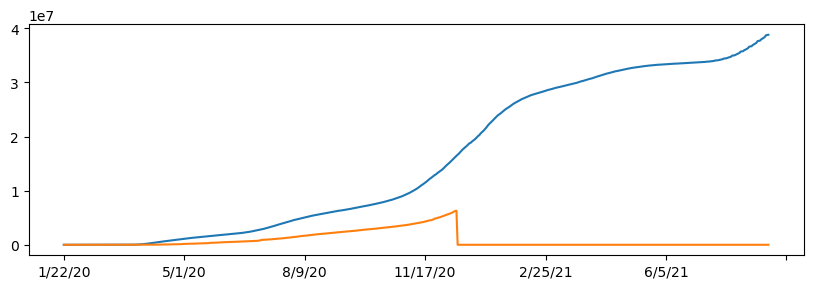

In [131]:
infected.loc['US'][2:].plot()
recovered.loc['US'][2:].plot()
plt.show()

> **Σημείωση** πώς χρησιμοποιούμε το `[2:]` για να αφαιρέσουμε τα δύο πρώτα στοιχεία μιας ακολουθίας που περιέχουν τη γεωτοποθεσία μιας χώρας. Μπορούμε επίσης να παραλείψουμε εντελώς αυτές τις δύο στήλες:


In [132]:
infected.drop(columns=['Lat','Long'],inplace=True)
recovered.drop(columns=['Lat','Long'],inplace=True)
deaths.drop(columns=['Lat','Long'],inplace=True)

## Εξετάζοντας τα Δεδομένα

Ας προχωρήσουμε τώρα στην εξέταση μιας συγκεκριμένης χώρας. Ας δημιουργήσουμε ένα πλαίσιο που περιέχει τα δεδομένα για τις μολύνσεις, ταξινομημένα κατά ημερομηνία:


In [133]:
def mkframe(country):
    df = pd.DataFrame({ 'infected' : infected.loc[country] ,
                        'recovered' : recovered.loc[country],
                        'deaths' : deaths.loc[country]})
    df.index = pd.to_datetime(df.index)
    return df

df = mkframe('US')
df

infected  recovered  deaths
2020-01-22         1          0       0
2020-01-23         1          0       0
2020-01-24         2          0       0
2020-01-25         2          0       0
2020-01-26         5          0       0
...              ...        ...     ...
2021-08-25  38223029          0  632272
2021-08-26  38384360          0  633564
2021-08-27  38707294          0  636720
2021-08-28  38760363          0  637254
2021-08-29  38796746          0  637531

[586 rows x 3 columns]

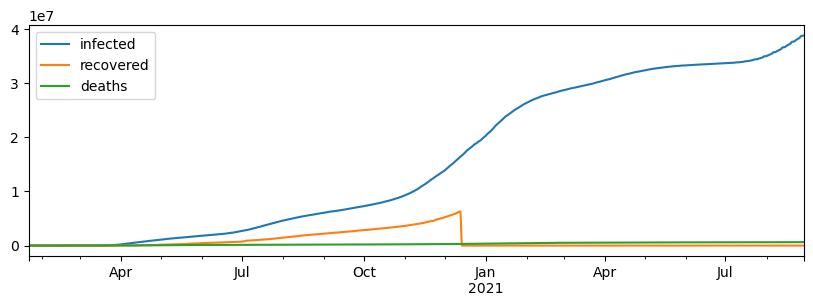

In [134]:
df.plot()
plt.show()

Τώρα ας υπολογίσουμε τον αριθμό των νέων μολυσμένων ατόμων κάθε μέρα. Αυτό θα μας επιτρέψει να δούμε την ταχύτητα με την οποία εξελίσσεται η πανδημία. Η πιο εύκολη μέθοδος για να το κάνουμε είναι να χρησιμοποιήσουμε `diff`:


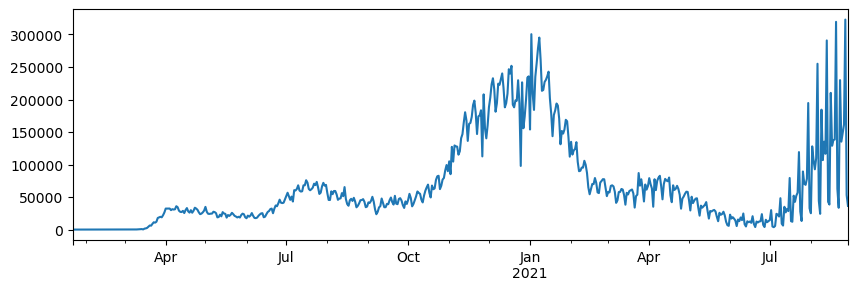

In [135]:
df['ninfected'] = df['infected'].diff()
df['ninfected'].plot()
plt.show()

Μπορούμε να δούμε μεγάλες διακυμάνσεις στα δεδομένα. Ας δούμε πιο προσεκτικά έναν από τους μήνες:


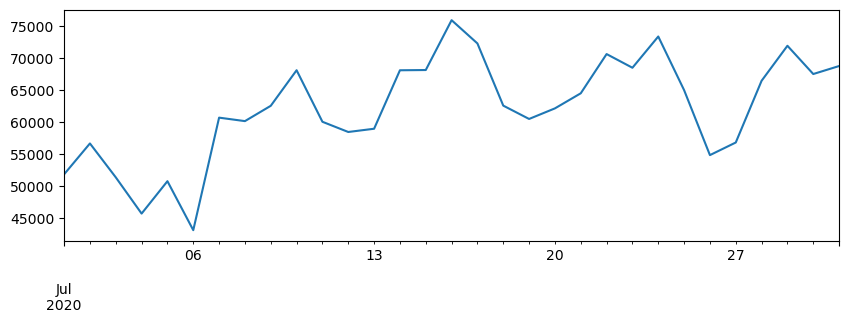

In [136]:
df[(df.index.year==2020) & (df.index.month==7)]['ninfected'].plot()
plt.show()

Φαίνεται ξεκάθαρα ότι υπάρχουν εβδομαδιαίες διακυμάνσεις στα δεδομένα. Επειδή θέλουμε να μπορούμε να βλέπουμε τις τάσεις, έχει νόημα να εξομαλύνουμε την καμπύλη υπολογίζοντας τον κινούμενο μέσο όρο (δηλαδή για κάθε ημέρα θα υπολογίζουμε τη μέση τιμή των προηγούμενων αρκετών ημερών):


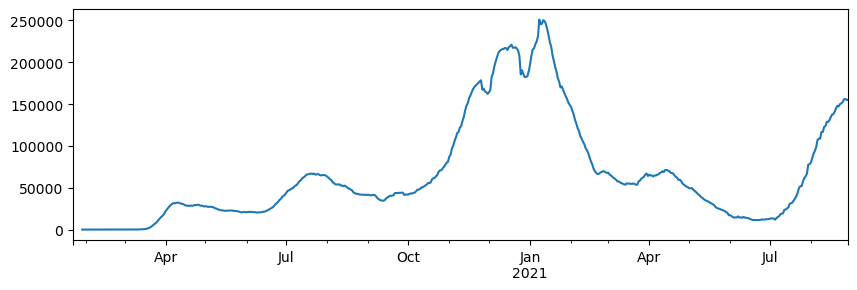

In [137]:
df['ninfav'] = df['ninfected'].rolling(window=7).mean()
df['ninfav'].plot()
plt.show()

Για να μπορέσουμε να συγκρίνουμε διάφορες χώρες, ίσως θέλουμε να λάβουμε υπόψη τον πληθυσμό της χώρας και να συγκρίνουμε το ποσοστό των μολυσμένων ατόμων σε σχέση με τον πληθυσμό της χώρας. Για να αποκτήσουμε τον πληθυσμό της χώρας, ας φορτώσουμε το σύνολο δεδομένων των χωρών:


In [138]:
countries = pd.read_csv(countries_dataset_url)
countries

UID iso2 iso3  code3     FIPS      Admin2 Province_State  \
0            4   AF  AFG    4.0      NaN         NaN            NaN   
1            8   AL  ALB    8.0      NaN         NaN            NaN   
2           12   DZ  DZA   12.0      NaN         NaN            NaN   
3           20   AD  AND   20.0      NaN         NaN            NaN   
4           24   AO  AGO   24.0      NaN         NaN            NaN   
...        ...  ...  ...    ...      ...         ...            ...   
4191  84056037   US  USA  840.0  56037.0  Sweetwater        Wyoming   
4192  84056039   US  USA  840.0  56039.0       Teton        Wyoming   
4193  84056041   US  USA  840.0  56041.0       Uinta        Wyoming   
4194  84056043   US  USA  840.0  56043.0    Washakie        Wyoming   
4195  84056045   US  USA  840.0  56045.0      Weston        Wyoming   

     Country_Region        Lat       Long_             Combined_Key  \
0       Afghanistan  33.939110   67.709953              Afghanistan   
1           Albania  41.153300   20.168300                  Albania   
2           Algeria  28.033900    1.659600                  Algeria   
3           Andorra  42.506300    1.521800                  Andorra   
4            Angola -11.202700   17.873900                   Angola   
...             ...        ...         ...                      ...   
4191             US  41.659439 -108.882788  Sweetwater, Wyoming, US   
4192             US  43.935225 -110.589080       Teton, Wyoming, US   
4193             US  41.287818 -110.547578       Uinta, Wyoming, US   
4194             US  43.904516 -107.680187    Washakie, Wyoming, US   
4195             US  43.839612 -104.567488      Weston, Wyoming, US   

      Population  
0     38928341.0  
1      2877800.0  
2     43851043.0  
3        77265.0  
4     32866268.0  
...          ...  
4191     42343.0  
4192     23464.0  
4193     20226.0  
4194      7805.0  
4195      6927.0  

[4196 rows x 12 columns]

Επειδή αυτό το σύνολο δεδομένων περιέχει πληροφορίες τόσο για χώρες όσο και για επαρχίες, για να πάρουμε τον πληθυσμό ολόκληρης της χώρας πρέπει να είμαστε λίγο πιο έξυπνοι:


In [139]:
countries[(countries['Country_Region']=='US') & countries['Province_State'].isna()]

UID iso2 iso3  code3  FIPS Admin2 Province_State Country_Region   Lat  \
790  840   US  USA  840.0   NaN    NaN            NaN             US  40.0   

     Long_ Combined_Key   Population  
790 -100.0           US  329466283.0

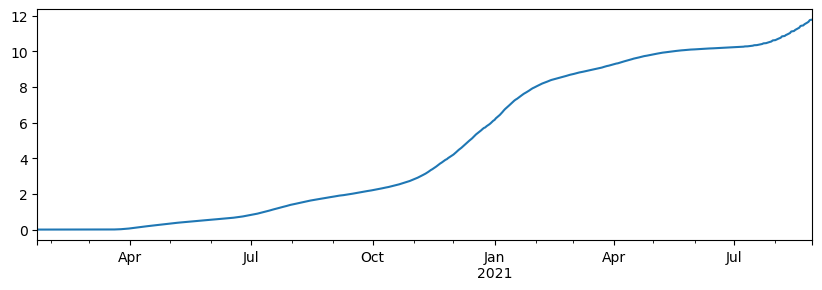

In [140]:
pop = countries[(countries['Country_Region']=='US') & countries['Province_State'].isna()]['Population'].iloc[0]
df['pinfected'] = df['infected']*100 / pop
df['pinfected'].plot(figsize=(10,3))
plt.show()

## Υπολογισμός $R_t$

Για να δούμε πόσο μεταδοτική είναι η ασθένεια, εξετάζουμε τον **βασικό αριθμό αναπαραγωγής** $R_0$, ο οποίος υποδεικνύει τον αριθμό των ατόμων που θα μολύνει περαιτέρω ένα μολυσμένο άτομο. Όταν το $R_0$ είναι μεγαλύτερο από 1, η επιδημία είναι πιθανό να εξαπλωθεί.

Το $R_0$ είναι μια ιδιότητα της ίδιας της ασθένειας και δεν λαμβάνει υπόψη ορισμένα προστατευτικά μέτρα που μπορεί να λάβουν οι άνθρωποι για να επιβραδύνουν την πανδημία. Κατά την εξέλιξη της πανδημίας, μπορούμε να εκτιμήσουμε τον αριθμό αναπαραγωγής $R_t$ σε οποιαδήποτε δεδομένη στιγμή $t$. Έχει αποδειχθεί ότι αυτός ο αριθμός μπορεί να εκτιμηθεί κατά προσέγγιση λαμβάνοντας ένα παράθυρο 8 ημερών και υπολογίζοντας $$R_t=\frac{I_{t-7}+I_{t-6}+I_{t-5}+I_{t-4}}{I_{t-3}+I_{t-2}+I_{t-1}+I_t}$$
όπου $I_t$ είναι ο αριθμός των νέων μολυσμένων ατόμων την ημέρα $t$.

Ας υπολογίσουμε το $R_t$ για τα δεδομένα της πανδημίας μας. Για να το κάνουμε αυτό, θα πάρουμε ένα κυλιόμενο παράθυρο 8 τιμών `ninfected` και θα εφαρμόσουμε τη συνάρτηση για να υπολογίσουμε την παραπάνω αναλογία:


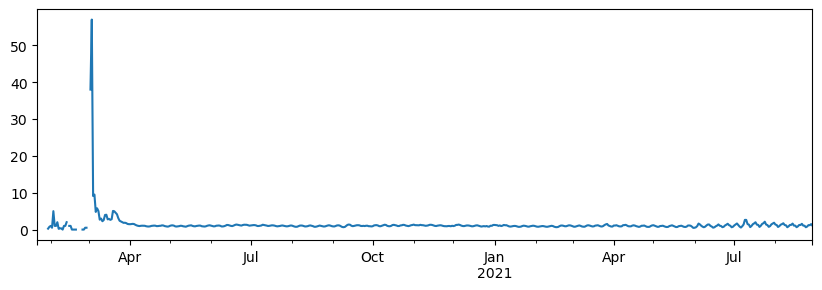

In [141]:
df['Rt'] = df['ninfected'].rolling(8).apply(lambda x: x[4:].sum()/x[:4].sum())
df['Rt'].plot()
plt.show()

Μπορείτε να δείτε ότι υπάρχουν κάποια κενά στο γράφημα. Αυτά μπορεί να οφείλονται είτε σε `NaN`, είτε σε `inf` τιμές που υπάρχουν στο σύνολο δεδομένων. Το `inf` μπορεί να προκληθεί από διαίρεση με το 0, ενώ το `NaN` μπορεί να υποδηλώνει ελλιπή δεδομένα ή απουσία δεδομένων για τον υπολογισμό του αποτελέσματος (όπως στην αρχή του πλαισίου μας, όπου το κυλιόμενο παράθυρο πλάτους 8 δεν είναι ακόμα διαθέσιμο). Για να κάνουμε το γράφημα πιο ευπαρουσίαστο, πρέπει να συμπληρώσουμε αυτές τις τιμές χρησιμοποιώντας τις συναρτήσεις `replace` και `fillna`.

Ας εξετάσουμε περαιτέρω την αρχή της πανδημίας. Θα περιορίσουμε επίσης τις τιμές του άξονα y ώστε να δείχνουν μόνο τιμές κάτω από το 6, για να έχουμε καλύτερη ορατότητα, και θα σχεδιάσουμε μια οριζόντια γραμμή στο 1.


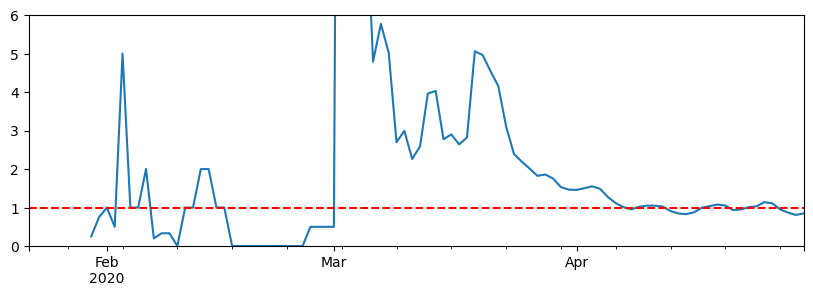

In [142]:
ax = df[df.index<"2020-05-01"]['Rt'].replace(np.inf,np.nan).fillna(method='pad').plot(figsize=(10,3))
ax.set_ylim([0,6])
ax.axhline(1,linestyle='--',color='red')
plt.show()

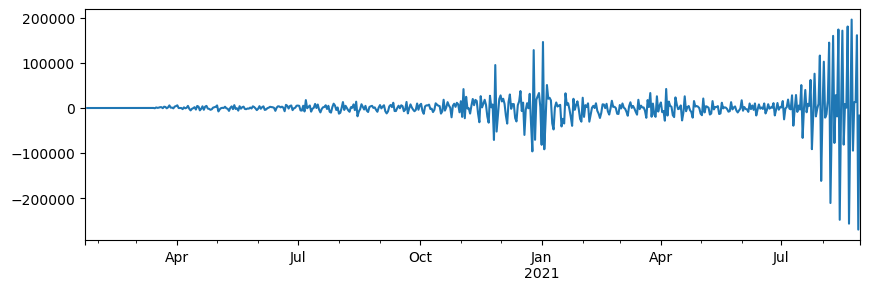

In [143]:
df['ninfected'].diff().plot()
plt.show()

Δεδομένου ότι υπάρχουν πολλές διακυμάνσεις στα δεδομένα που προκαλούνται από την αναφορά, έχει νόημα να εξομαλυνθεί η καμπύλη εφαρμόζοντας κυλιόμενο μέσο όρο για να αποκτήσουμε τη συνολική εικόνα. Ας επικεντρωθούμε ξανά στους πρώτους μήνες της πανδημίας:


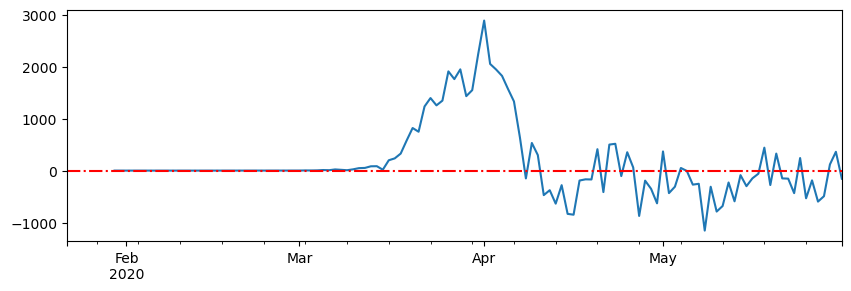

In [150]:
ax=df[df.index<"2020-06-01"]['ninfected'].diff().rolling(7).mean().plot()
ax.axhline(0,linestyle='-.',color='red')
plt.show()

## Πρόκληση

Ήρθε η ώρα να πειραματιστείτε περισσότερο με τον κώδικα και τα δεδομένα! Εδώ είναι μερικές προτάσεις που μπορείτε να δοκιμάσετε:
* Δείτε την εξάπλωση της πανδημίας σε διαφορετικές χώρες.
* Σχεδιάστε γραφήματα $R_t$ για πολλές χώρες σε ένα γράφημα για σύγκριση ή δημιουργήστε πολλά γραφήματα δίπλα-δίπλα.
* Δείτε πώς ο αριθμός των θανάτων και των αναρρώσεων συσχετίζεται με τον αριθμό των μολυσμένων περιπτώσεων.
* Προσπαθήστε να ανακαλύψετε πόσο διαρκεί συνήθως μια ασθένεια, συσχετίζοντας οπτικά τον ρυθμό μόλυνσης και τον ρυθμό θανάτων και αναζητώντας κάποιες ανωμαλίες. Ίσως χρειαστεί να εξετάσετε διαφορετικές χώρες για να το διαπιστώσετε.
* Υπολογίστε το ποσοστό θνησιμότητας και πώς αυτό αλλάζει με την πάροδο του χρόνου. Ίσως θελήσετε να λάβετε υπόψη τη διάρκεια της ασθένειας σε ημέρες για να μετατοπίσετε μία χρονοσειρά πριν κάνετε υπολογισμούς.


## Αναφορές

Μπορείτε να μελετήσετε περαιτέρω την εξάπλωση της επιδημίας COVID στις παρακάτω δημοσιεύσεις:
* [Sliding SIR Model for Rt Estimation during COVID Pandemic](https://soshnikov.com/science/sliding-sir-model-for-rt-estimation/), ανάρτηση στο blog από τον [Dmitry Soshnikov](http://soshnikov.com)
* T.Petrova, D.Soshnikov, A.Grunin. [Estimation of Time-Dependent Reproduction Number for Global COVID-19 Outbreak](https://www.preprints.org/manuscript/202006.0289/v1). *Preprints* **2020**, 2020060289 (doi: 10.20944/preprints202006.0289.v1)
* [Κώδικας για το παραπάνω άρθρο στο GitHub](https://github.com/shwars/SlidingSIR)



---

**Αποποίηση ευθύνης**:  
Αυτό το έγγραφο έχει μεταφραστεί χρησιμοποιώντας την υπηρεσία αυτόματης μετάφρασης [Co-op Translator](https://github.com/Azure/co-op-translator). Παρόλο που καταβάλλουμε προσπάθειες για ακρίβεια, παρακαλούμε να έχετε υπόψη ότι οι αυτοματοποιημένες μεταφράσεις ενδέχεται να περιέχουν λάθη ή ανακρίβειες. Το πρωτότυπο έγγραφο στη μητρική του γλώσσα θα πρέπει να θεωρείται η αυθεντική πηγή. Για κρίσιμες πληροφορίες, συνιστάται επαγγελματική ανθρώπινη μετάφραση. Δεν φέρουμε ευθύνη για τυχόν παρεξηγήσεις ή εσφαλμένες ερμηνείες που προκύπτουν από τη χρήση αυτής της μετάφρασης.
